<a href="https://colab.research.google.com/github/Tar-ive/ML-projects/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import zipfile
import os

zip_file_path = '/content/archive (2).zip'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

print("Files extracted:")

!ls


Files extracted:
'archive (2).zip'   sample_data   spotify_top_songs_audio_features.csv


In [8]:
import pandas as pd
df= pd.read_csv('/content/spotify_top_songs_audio_features.csv')

In [9]:
df

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.000000,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.000000,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.000000,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.000000,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.000000,0.0755,0.688,-4.806,97.014,193507,30,301860377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,7zgqtptZvhf8GEmdsM2vp2,Taylor Swift,...Ready For It?,"Big Machine Records, LLC",D,Major,4 beats,0.615,0.779,0.1350,0.06650,0.000000,0.1550,0.453,-6.454,160.000,208198,1,17583532
6509,7zjEyeBsaw9gV0jofJLfOM,"Young Thug, A$AP Rocky, Post Malone",Livin It Up (with Post Malone & A$AP Rocky),300 Entertainment/Atl,G,Major,4 beats,0.767,0.313,0.0798,0.83800,0.000000,0.1050,0.765,-12.059,82.582,210907,2,10526635
6510,7zl7kehxesNEo2pYkKXTSe,"Eminem, Jack Harlow, Cordae",Killer (feat. Jack Harlow & Cordae) - Remix,Shady/Aftermath/Interscope Records,B,Minor,4 beats,0.924,0.730,0.2740,0.05250,0.000000,0.1130,0.848,-6.125,99.010,236666,1,5404939
6511,7zvfDihYiJ8RQ1nRcpKBF5,"Kendrick Lamar, Tanna Leone",Mr. Morale,pgLang/Top Dawg Entertainment/Aftermath/Inters...,A,Major,3 beats,0.727,0.530,0.3120,0.28300,0.000028,0.3920,0.258,-8.616,174.025,210841,1,12872010


In [11]:
df.columns

Index(['id', 'artist_names', 'track_name', 'source', 'key', 'mode',
       'time_signature', 'danceability', 'energy', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'loudness',
       'tempo', 'duration_ms', 'weeks_on_chart', 'streams'],
      dtype='object')

In [12]:
df['artist_names'].value_counts()

Taylor Swift                     175
Drake                            111
BTS                               71
Bad Bunny                         70
Ariana Grande                     60
                                ... 
Becky G, NATTI NATASHA             1
Shakira, Manuel Turizo             1
Martin Garrix, Bono, The Edge      1
Lauv, Julia Michaels               1
Kendrick Lamar, Tanna Leone        1
Name: artist_names, Length: 3001, dtype: int64

<ipython-input-13-7732fe048f4e>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['artist_names']=df['artist_names'].str.replace('$','')


<Axes: >

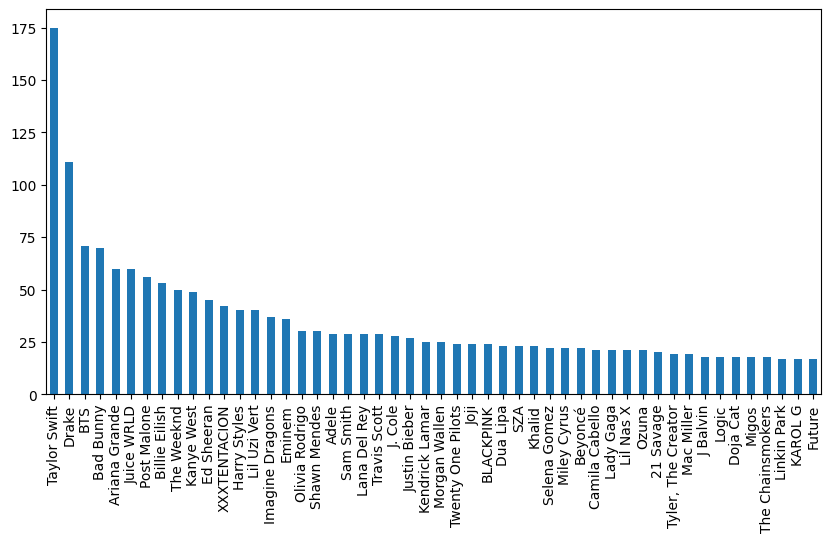

In [13]:
df['artist_names']=df['artist_names'].str.replace('$','')
df['artist_names'].value_counts().head(50).plot.bar(figsize=(10,5))

In [15]:
import plotly.express as px

In [19]:
df_sorted_streams = df.sort_values(by='streams', ascending=False)
fig = px.bar(df_sorted_streams.iloc[0:10],
             y='streams',
             x='track_name',
             title='Top 10 most streamed Songs in Spotify TOP 200 chart since 2016',
             labels={'streams':'Streams count',
                     'track_name': 'Track name'},
             color='energy')

fig.update_layout(title_x=0.5)
fig.show()

In [17]:
fig=px.bar(df['artist_names'].value_counts().head(10),
           x=df['artist_names'].value_counts().head(10).index,
           y=df['artist_names'].value_counts().head(10),
           labels={'x': 'Artist Names',
                   'y': 'Track counts'},
           title='Top 10 Artist that have the highest number of tracks on Spotify TOP 200 chart since 2016',
          )

fig.update_layout(title_x=0.5)
fig.show()

In [23]:
grouped_df = df.groupby('artist_names').agg({'track_name': 'count', 'weeks_on_chart': 'sum'}).sort_values( by='weeks_on_chart',ascending=False).iloc[0:10]
grouped_df.head()
fig = px.bar(grouped_df,
             x=grouped_df.index,
             y=grouped_df['weeks_on_chart'],
             labels={'artist_names': 'Artist name',
                     'weeks_on_chart': 'Weeks on chart'},
             color='track_name',
             title='Top 10 artist that spent the highest number of weeks on Spotify TOP 200 chart since 2016')

fig.update_layout(title_x=0.5)
fig.show()

In [25]:
df_corr=df.corr()
df_corr

<ipython-input-25-c996e72bcb19>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
danceability,1.000000,0.132397,0.184578,-0.248447,-0.081519,-0.081186,0.346597,0.188109,-0.058747,-0.155502,0.015205,0.011551
energy,0.132397,1.000000,-0.007855,-0.515303,-0.069500,0.135981,0.375763,0.727379,0.095561,0.013937,0.009613,0.001399
speechiness,0.184578,-0.007855,1.000000,-0.075279,-0.048271,0.055040,0.037357,-0.064261,0.123775,-0.039070,-0.087384,-0.085806
acousticness,-0.248447,-0.515303,-0.075279,1.000000,0.063984,-0.045413,-0.081847,-0.427972,-0.071007,-0.034989,0.004370,0.012926
instrumentalness,-0.081519,-0.069500,-0.048271,0.063984,1.000000,-0.005276,-0.112222,-0.182663,-0.006436,-0.034694,-0.021996,-0.019188
liveness,-0.081186,0.135981,0.055040,-0.045413,-0.005276,1.000000,0.036476,0.059125,-0.002338,0.000673,-0.047156,-0.039445
valence,0.346597,0.375763,0.037357,-0.081847,-0.112222,0.036476,1.000000,0.300003,0.051097,-0.152047,0.041190,0.037192
loudness,0.188109,0.727379,-0.064261,-0.427972,-0.182663,0.059125,0.300003,1.000000,0.066723,0.016177,0.050671,0.035809
tempo,-0.058747,0.095561,0.123775,-0.071007,-0.006436,-0.002338,0.051097,0.066723,1.000000,-0.017492,-0.017994,-0.012052
duration_ms,-0.155502,0.013937,-0.039070,-0.034989,-0.034694,0.000673,-0.152047,0.016177,-0.017492,1.000000,0.031530,0.014761


<Axes: >

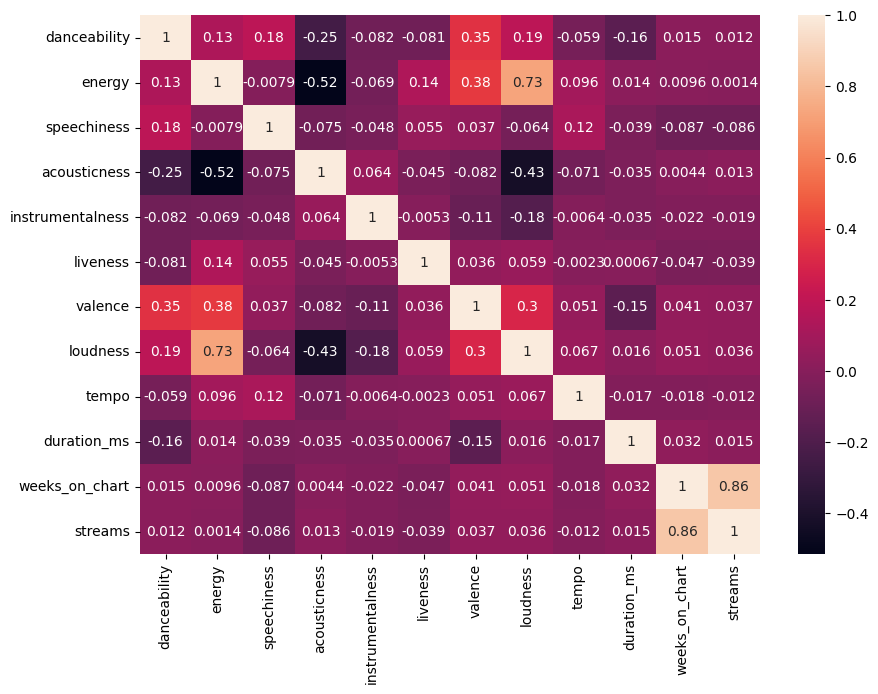

In [37]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_corr, annot=True)

In [40]:
top_artists = df.groupby('artist_names')['streams'].sum().nlargest(5).index

In [41]:
df_top_artists = df[df['artist_names'].isin(top_artists)]

In [42]:
artist_temporal_trends = df_top_artists.groupby(['artist_names', 'weeks_on_chart']).agg({'streams': 'sum'}).reset_index()

In [31]:
top_labels = df.groupby('source')['streams'].sum().nlargest(5).index

In [32]:
df_top_labels = df[df['source'].isin(top_labels)]

In [33]:
label_temporal_trends = df_top_labels.groupby(['source', 'weeks_on_chart']).agg({'streams': 'sum'}).reset_index()

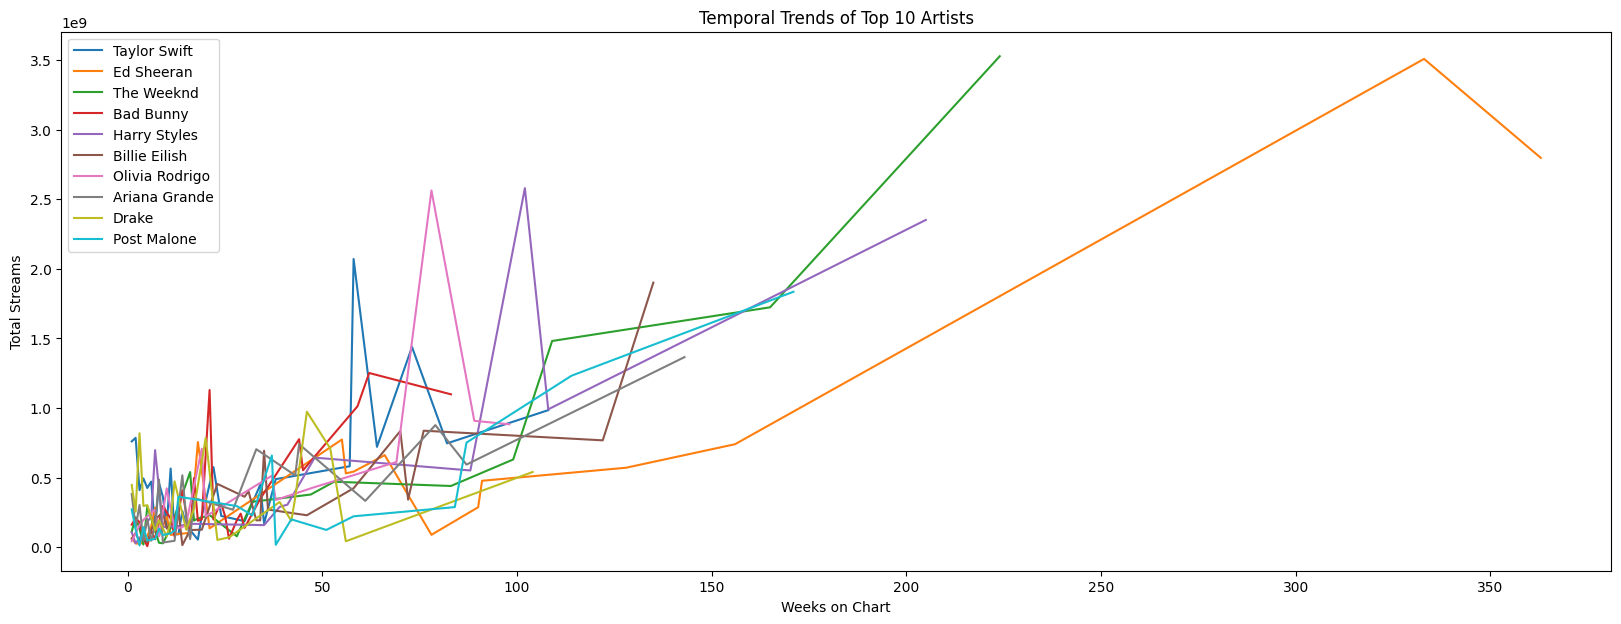

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 7))
for artist in top_artists:
    artist_data = artist_temporal_trends[artist_temporal_trends['artist_names'] == artist]
    plt.plot(artist_data['weeks_on_chart'], artist_data['streams'], label=artist)
plt.title('Temporal Trends of Top 10 Artists')
plt.xlabel('Weeks on Chart')
plt.ylabel('Total Streams')
plt.legend()
plt.show()

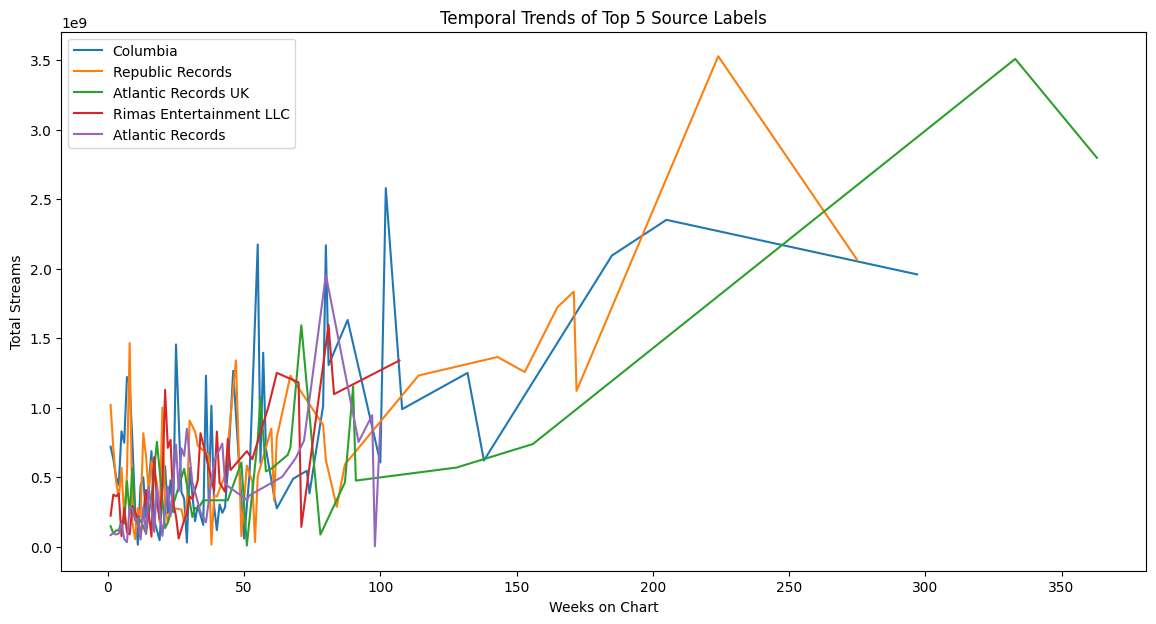

In [38]:
plt.figure(figsize=(14, 7))
for label in top_labels:
    label_data = label_temporal_trends[label_temporal_trends['source'] == label]
    plt.plot(label_data['weeks_on_chart'], label_data['streams'], label=label)

plt.title('Temporal Trends of Top 5 Source Labels')
plt.xlabel('Weeks on Chart')
plt.ylabel('Total Streams')
plt.legend()
plt.show()

In [44]:
fig_artist = px.line(artist_temporal_trends, x='weeks_on_chart', y='streams', color='artist_names',
                     title='Temporal Trends of Top 5 Artists', labels={'weeks_on_chart': 'Weeks on Chart', 'streams': 'Total Streams'})
fig_artist.update_layout(xaxis_title='Weeks on Chart', yaxis_title='Total Streams')
fig_artist.show()

In [45]:
fig_label = px.line(label_temporal_trends, x='weeks_on_chart', y='streams', color='source',
                    title='Temporal Trends of Top 5 Source Labels', labels={'weeks_on_chart': 'Weeks on Chart', 'streams': 'Total Streams'})
fig_label.update_layout(xaxis_title='Weeks on Chart', yaxis_title='Total Streams')
fig_label.show()

In [46]:
def moving_average(series, window_size=3):
    return series.rolling(window=window_size).mean()

In [47]:
df['streams_smooth'] = df.groupby('source')['streams'].transform(lambda x: moving_average(x))


In [56]:
fig_label = px.line(df, x='weeks_on_chart', y='streams_smooth', color='source',
                    title='Temporal Trends of Top 5 Source Labels (Smoothed)',
                    labels={'weeks_on_chart': 'Weeks on Chart', 'streams_smooth': 'Total Streams (Smoothed)'})

fig_label.update_traces(mode='lines+markers')  # Add markers to lines
fig_label.update_layout(xaxis_title='Weeks on Chart', yaxis_title='Total Streams', hovermode='x')

In [57]:
label_trends = df.groupby(['source', 'weeks_on_chart'])['streams'].sum().reset_index()

In [59]:
df['is_collaboration'] = df['artist_names'].str.contains(',')

In [60]:
average_streams = df.groupby('is_collaboration')['streams'].mean().reset_index()

In [61]:
average_streams.rename(columns={'is_collaboration': 'Collaboration', 'streams': 'Average Streams'}, inplace=True)
average_streams['Collaboration'] = average_streams['Collaboration'].map({False: 'Solo', True: 'Collaboration'})

In [62]:
fig = px.bar(average_streams, x='Collaboration', y='Average Streams', title='Average Streams: Solo vs. Collaboration Tracks')
fig.show()

In [63]:
df

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,...,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams,streams_smooth,is_collaboration
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,...,0.000000,0.0852,0.524,-6.029,120.963,188491,17,107527761,NaN,True
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,...,0.000000,0.3900,0.437,-6.276,191.153,193680,2,9944865,NaN,False
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,...,0.000000,0.0995,0.236,-5.230,148.033,222973,125,512388123,NaN,False
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,...,0.000000,0.3140,0.665,-7.438,167.911,284856,2,11985346,NaN,True
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,...,0.000000,0.0755,0.688,-4.806,97.014,193507,30,301860377,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,7zgqtptZvhf8GEmdsM2vp2,Taylor Swift,...Ready For It?,"Big Machine Records, LLC",D,Major,4 beats,0.615,0.779,0.1350,...,0.000000,0.1550,0.453,-6.454,160.000,208198,1,17583532,1.016770e+08,False
6509,7zjEyeBsaw9gV0jofJLfOM,"Young Thug, AAP Rocky, Post Malone",Livin It Up (with Post Malone & A$AP Rocky),300 Entertainment/Atl,G,Major,4 beats,0.767,0.313,0.0798,...,0.000000,0.1050,0.765,-12.059,82.582,210907,2,10526635,6.280020e+07,True
6510,7zl7kehxesNEo2pYkKXTSe,"Eminem, Jack Harlow, Cordae",Killer (feat. Jack Harlow & Cordae) - Remix,Shady/Aftermath/Interscope Records,B,Minor,4 beats,0.924,0.730,0.2740,...,0.000000,0.1130,0.848,-6.125,99.010,236666,1,5404939,7.634333e+06,True
6511,7zvfDihYiJ8RQ1nRcpKBF5,"Kendrick Lamar, Tanna Leone",Mr. Morale,pgLang/Top Dawg Entertainment/Aftermath/Inters...,A,Major,3 beats,0.727,0.530,0.3120,...,0.000028,0.3920,0.258,-8.616,174.025,210841,1,12872010,2.482323e+07,True


In [71]:
df['is_collaboration'] = df['artist_names'].str.contains(',|&|feat.|Featuring', regex=True)

In [72]:
collab_df = df[df['is_collaboration']]

In [73]:
collab_success = collab_df.groupby(['artist_names','track_name']).agg({'streams': 'sum', 'weeks_on_chart': 'max'}).reset_index()

In [74]:
most_successful_collabs = collab_success.sort_values(by='streams', ascending=False)

In [75]:
top_n = 10
most_successful_collabs.head(top_n)

,artist_names,track_name,streams,weeks_on_chart
1825,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,3098341628,275
2149,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),2878390502,138
271,"Billie Eilish, Khalid",lovely (with Khalid),2633763268,308
2019,"Shawn Mendes, Camila Cabello",Señorita,2077696365,146
1810,"Post Malone, 21 Savage",rockstar (feat. 21 Savage),2075830835,172
2162,"The Weeknd, Daft Punk",Starboy,1917128762,180
712,"Elton John, Dua Lipa, PNAU",Cold Heart - PNAU Remix,1830956048,129
1235,"Lady Gaga, Bradley Cooper",Shallow,1734556338,181
1281,"Lil Nas X, Jack Harlow",INDUSTRY BABY (feat. Jack Harlow),1632867564,81
200,"Bad Bunny, Chencho Corleone",Me Porto Bonito,1595512799,81


# Relationship Between Valence and Music Popularity


In [76]:
correlation = df['valence'].corr(df['streams'])

In [79]:
correlation

0.03719232128427661

In [78]:
fig = px.scatter(df, x='valence', y='streams', trendline='ols',
                 title=f'Valence vs. Streams (Correlation: {correlation:.2f})',
                 labels={'valence': 'Valence (Musical Positivity)', 'streams': 'Streams (Popularity)'})
fig.show()

A correlation of approximately 0.037 suggests a very weak positive relationship between valence and song streams in your dataset. This implies that as valence increases, there is a slight tendency for streams to increase as well.

In [80]:
correlation1 = df['valence'].corr(df['weeks_on_chart'])

In [81]:
fig = px.scatter(df, x='valence', y='weeks_on_chart', trendline='ols',
                 title=f'Valence vs. Weeks on Chaer (Correlation: {correlation:.2f})',
                 labels={'valence': 'Valence (Musical Positivity)', 'weeks_on_chart': 'Weeks on Chart'})
fig.show()

# Analyzing the Popularity of the Song for More Speech Oriented Tracks

In [82]:
acousticness_correlation = df['acousticness'].corr(df['streams'])
speechiness_correlation = df['speechiness'].corr(df['streams'])

In [83]:
print(f'Correlation between acousticness and streams: {acousticness_correlation:.3f}')
print(f'Correlation between speechiness and streams: {speechiness_correlation:.3f}')

Correlation between acousticness and streams: 0.013
Correlation between speechiness and streams: -0.086


In [85]:
fig_acousticness = px.scatter(df, x='acousticness', y='streams', trendline='ols',
                              title='Acousticness vs. Streams',
                              labels={'acousticness': 'Acousticness', 'streams': 'Streams'})
fig_acousticness.show()


fig_speechiness = px.scatter(df, x='speechiness', y='streams', trendline='ols',
                             title='Speechiness vs. Streams',
                             labels={'speechiness': 'Speechiness', 'streams': 'Streams'})
fig_speechiness.show()

In [86]:
df.columns

Index(['id', 'artist_names', 'track_name', 'source', 'key', 'mode',
       'time_signature', 'danceability', 'energy', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'loudness',
       'tempo', 'duration_ms', 'weeks_on_chart', 'streams', 'streams_smooth',
       'is_collaboration', 'collaboration'],
      dtype='object')

# ML Song Recommendation

In [91]:
unique_artists = df['artist_names'].unique()

In [88]:
unique_artists

array(['ZAYN, PARTYNEXTDOOR', 'Alessia Cara', 'The Killers', ...,
       'Young Thug, AAP Rocky, Post Malone',
       'Eminem, Jack Harlow, Cordae', 'Kendrick Lamar, Tanna Leone'],
      dtype=object)